**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

**Load and preprocess the CIFAR-10 dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Define the labels of the dataset**

In [ ]:
original_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
binary_labels = ['cannot fly', 'can fly']

**Convert labels to binary classes**

In [ ]:
y_train_binary = np.where(np.isin(y_train, [0, 2]), 1, 0)
y_test_binary = np.where(np.isin(y_test, [0, 2]), 1, 0)

**Class disctribution in training set**



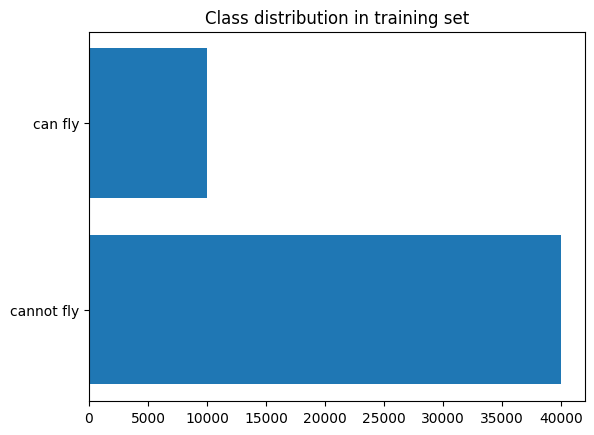

In [ ]:
classes, counts = np.unique(y_train_binary, return_counts=True)
plt.barh(binary_labels, counts)
plt.title('Class distribution in training set')
plt.show()

**Class disctribution in testing set**

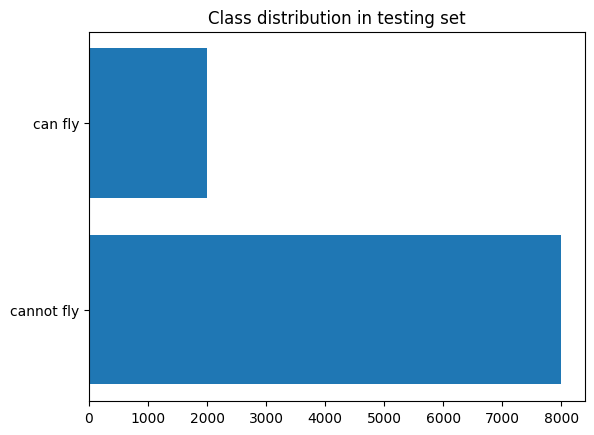

In [ ]:
classes, counts = np.unique(y_test_binary, return_counts=True)
plt.barh(binary_labels, counts)
plt.title('Class distribution in testing set')
plt.show()

 **Scale the data**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Transform target variable into one-hotencoding**

In [ ]:
y_cat_train = to_categorical(y_train_binary, 2)
y_cat_test = to_categorical(y_test_binary, 2)

 **Model definition**

In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

**Convolutional layers**

In [ ]:
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

**Compile the model**

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

**Early stopping**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

**Data augmentation**

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

**Train the model**

In [ ]:
r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
              callbacks=[early_stop],
             )

Epoch 1/50
1562/1562 [==============================] - 413s 262ms/step - loss: 0.4241 - accuracy: 0.8250 - precision: 0.8250 - recall: 0.8250 - val_loss: 0.5042 - val_accuracy: 0.8470 - val_precision: 0.8470 - val_recall: 0.8470
Epoch 2/50
1562/1562 [==============================] - 423s 271ms/step - loss: 0.3489 - accuracy: 0.8577 - precision: 0.8577 - recall: 0.8577 - val_loss: 0.4735 - val_accuracy: 0.8469 - val_precision: 0.8469 - val_recall: 0.8469
Epoch 3/50
1562/1562 [==============================] - 413s 264ms/step - loss: 0.3126 - accuracy: 0.8739 - precision: 0.8739 - recall: 0.8739 - val_loss: 0.2965 - val_accuracy: 0.8859 - val_precision: 0.8859 - val_recall: 0.8859
Epoch 4/50
1562/1562 [==============================] - 415s 266ms/step - loss: 0.2921 - accuracy: 0.8823 - precision: 0.8823 - recall: 0.8823 - val_loss: 0.3527 - val_accuracy: 0.8662 - val_precision: 0.8662 - val_recall: 0.8662
Epoch 5/50
1562/1562 [==============================] - 415s 266ms/step - loss: 

**Evaluate the model**

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 21s 67ms/step - loss: 0.4129 - accuracy: 0.8461 - precision: 0.8461 - recall: 0.8461
Test Accuracy : 84.61%


**Confusion matrix and classification report**



313/313 [==============================] - 20s 64ms/step


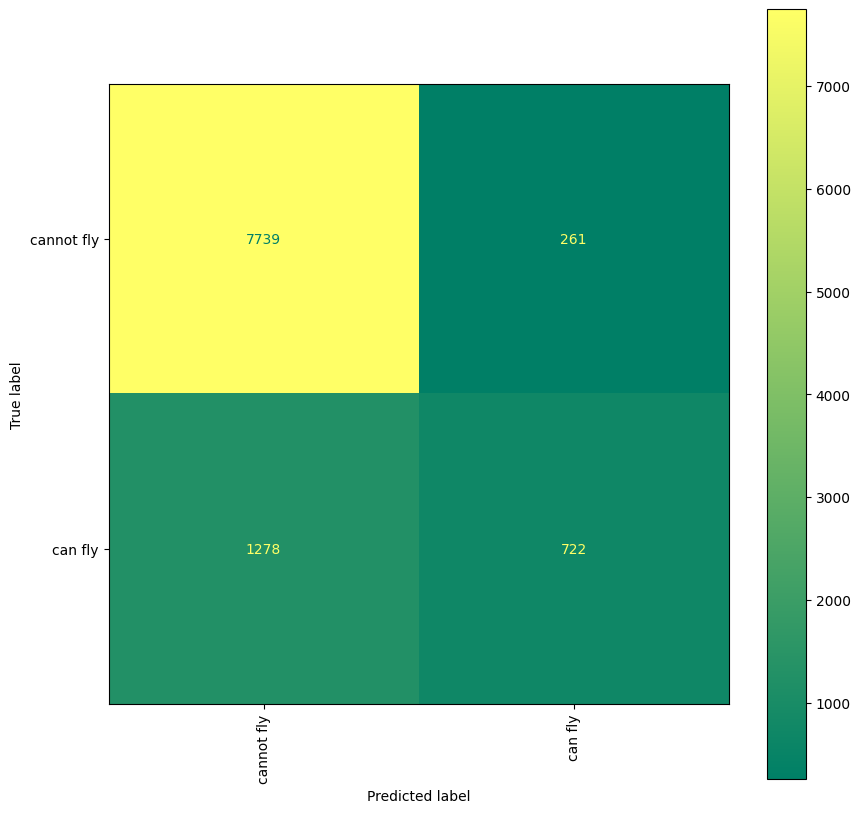

              precision    recall  f1-score   support

  cannot fly       0.86      0.97      0.91      8000
     can fly       0.73      0.36      0.48      2000

    accuracy                           0.85     10000
   macro avg       0.80      0.66      0.70     10000
weighted avg       0.83      0.85      0.82     10000



In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_binary, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binary_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

print(classification_report(y_test_binary, y_pred_binary, target_names=binary_labels))


**Display predictions**

313/313 [==============================] - 26s 82ms/step


<ipython-input-30-a5080779c633>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{binary_labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({binary_labels[int(true_label)]})",
<ipython-input-30-a5080779c633>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


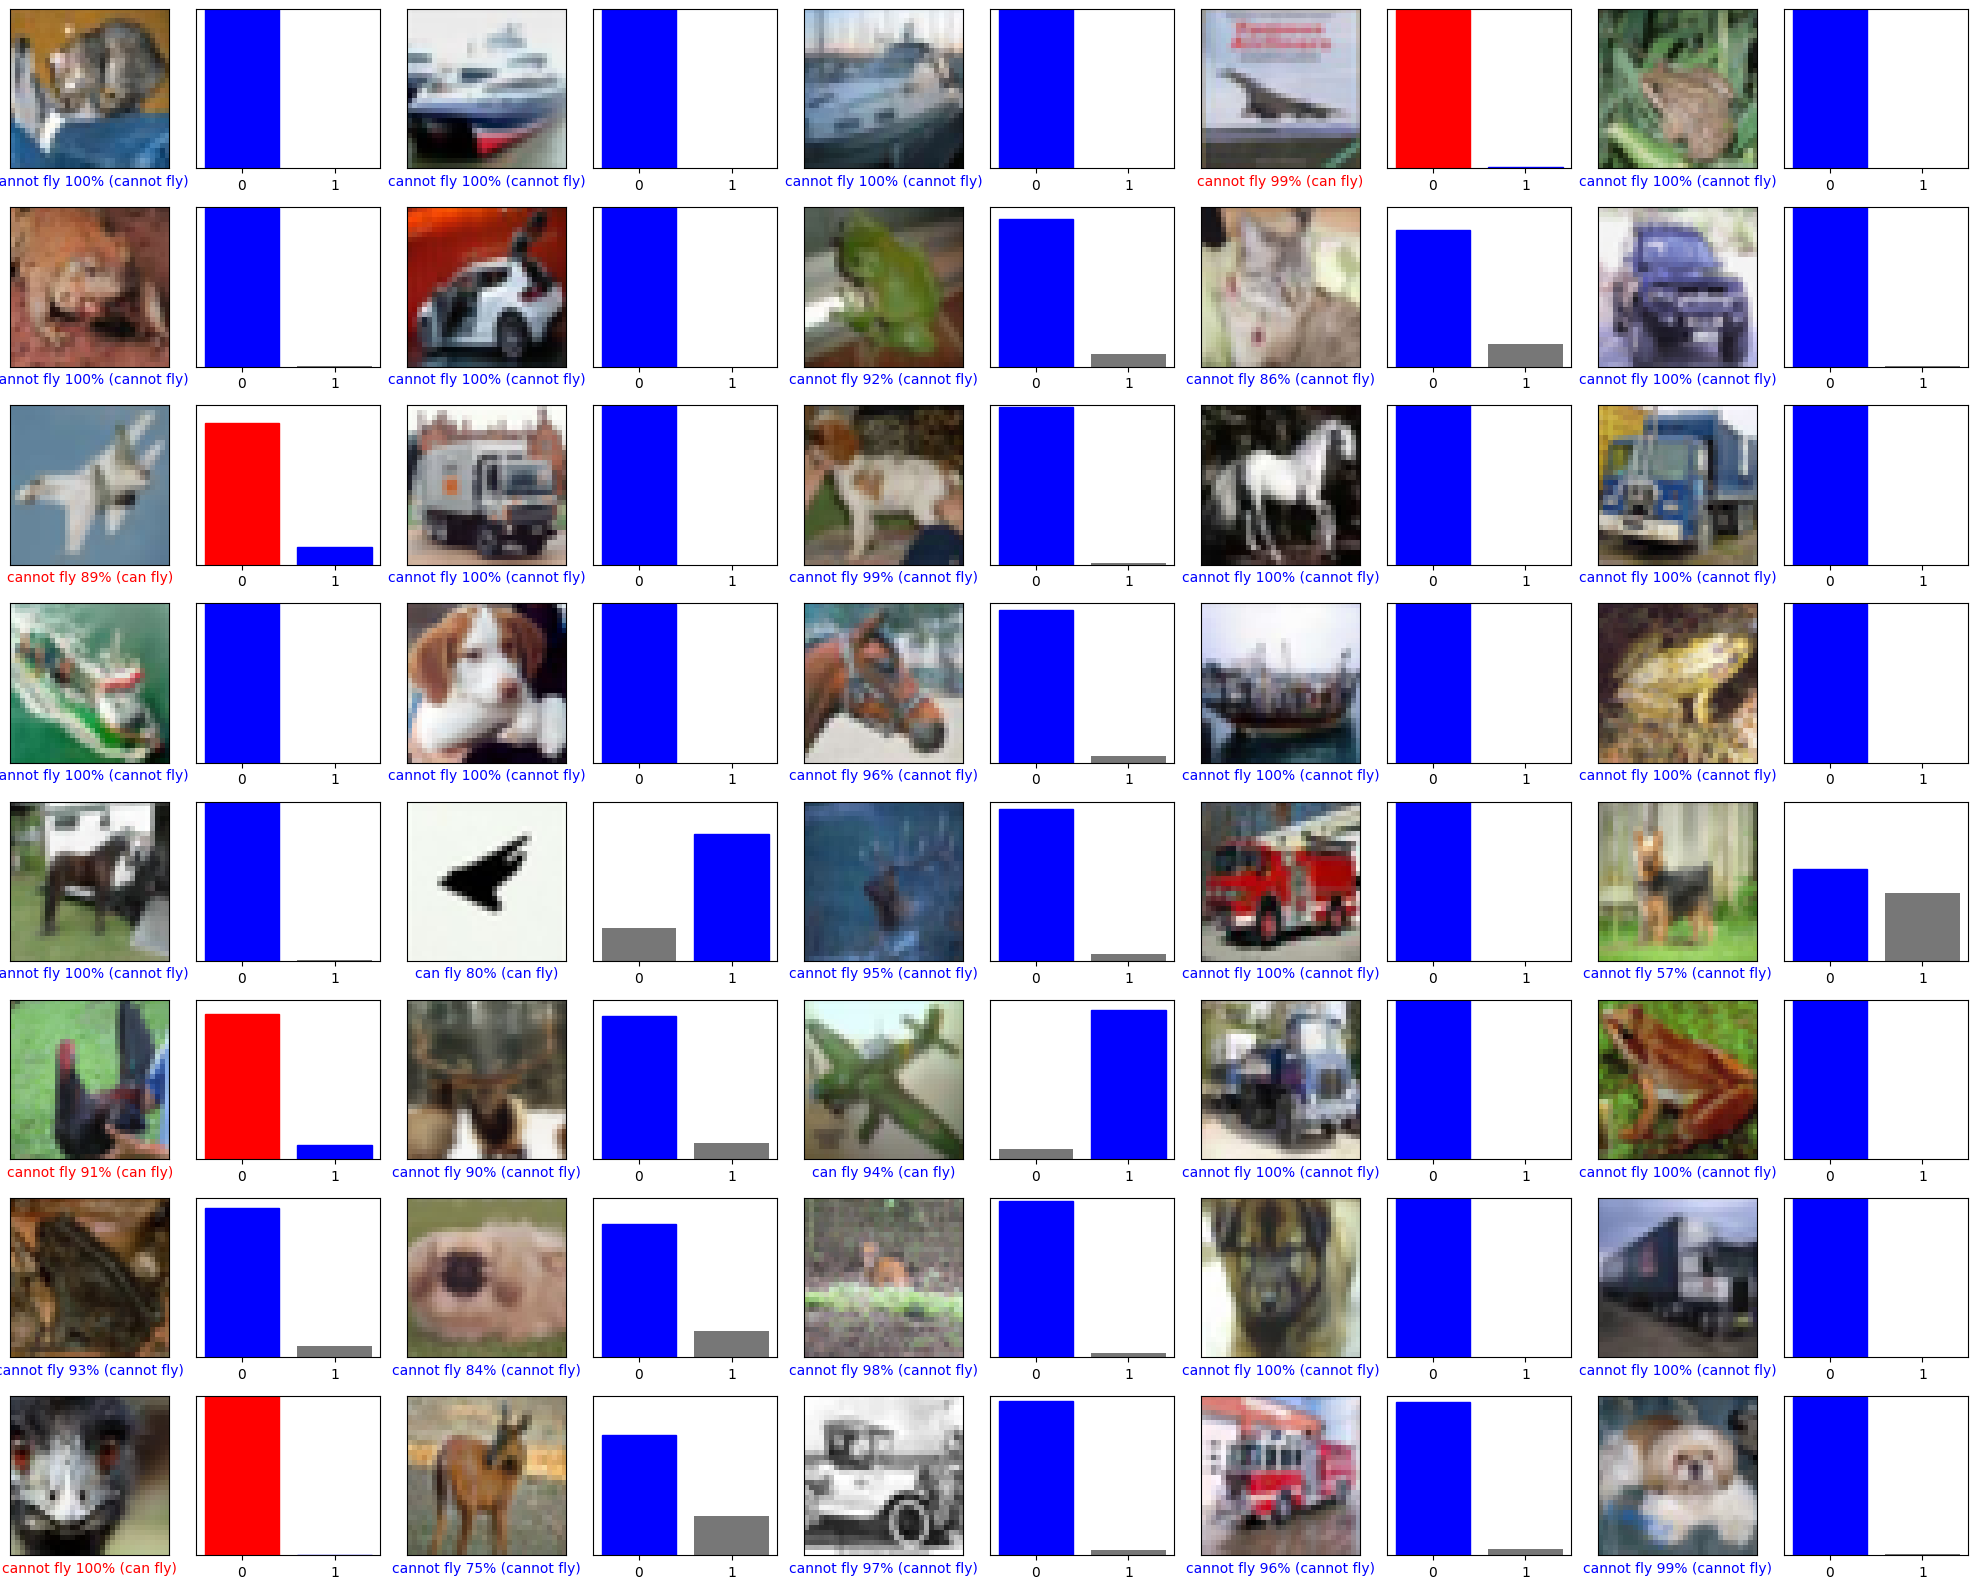

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{binary_labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({binary_labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

predictions = model.predict(X_test)

num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test_binary, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test_binary)
plt.tight_layout()
plt.show()

In [28]:
model.save('my_model.h5')